# Analysing the data from amazon. "Top 5o best selling books - 2009 to 2019"


## DATA ACQUISITION

### Loading the data and necessary packages

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("amazonbestsellers.csv")
data.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


## PROJECT SCOPING:

In this project, the data from amazon has been explored to answer some of the aspects listed below.

1. Which author has written the maximum number of books?
2. Which books have the highest and lowest prices?
3. Which book has the highest user rating?
4. Which book has the highest number of reviews?
5. How many types of genre are there, and how many books each genre consists of?
6. Which year has the highest number of books sale?
7. Is there a relation between the user rating and cost of the books?

## DATA TIDYING

In [3]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [8]:
data['Name'].duplicated().sum()

199

#### * There are no missing values.
#### * The nunique command shows the numner of unique values. The Other rows can have same values, but the 'Name' column should not have same names.
#### * Exploring the 'Name' column shows there are 199 duplicate values.
#### * In the next step we have dropped the duplicate rows.



In [9]:
data = data.drop_duplicates('Name')

In [10]:
data.shape

(351, 7)

In [11]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        345
Price           40
Year            11
Genre            2
dtype: int64

* So after dropping the duplicate rows we have 351 rows in total.

## EXPLORING DATA WITH VISUALIZATIONS

#### Name of the Author with maximum number of books.

In [163]:
max_numofbooks = data.Author.value_counts(ascending = False)
max_numofbooks

Jeff Kinney              12
Rick Riordan             10
Stephenie Meyer           7
Dav Pilkey                6
J.K. Rowling              6
                         ..
Thomas Campbell           1
William Davis             1
Emily Winfield Martin     1
Mike Moreno               1
Kristin Hannah            1
Name: Author, Length: 248, dtype: int64

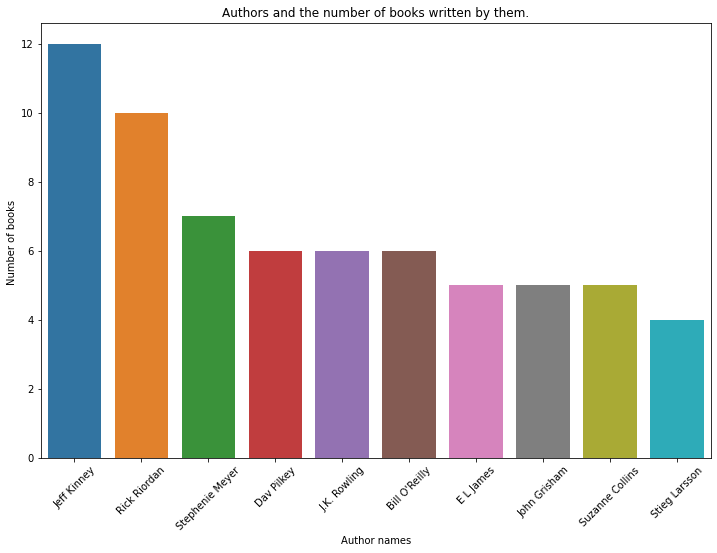

In [71]:
var = data["Author"]
varValue = var.value_counts()
var2 = varValue.head(10)
plt.figure(figsize=(12,8))
sns.barplot(var2.index,var2)
plt.title("Authors and the number of books written by them.")
plt.xlabel("Author names")
plt.ylabel("Number of books ")
plt.xticks(rotation = 45)
plt.show()

#### Books with highest and lowest prices.

In [60]:
max_low_price = data[["Price","Name"]].groupby("Price").count().sort_values(by = "Price").reset_index()
max_low_price

,Price,Name
0,0,9
1,1,1
2,2,4
3,3,1
4,4,15
5,5,18
6,6,24
7,7,13
8,8,23
9,9,27


Books with lowest price

In [176]:
data[data["Price"]== 0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction


Book with maximum price

In [177]:
data[data["Price"]== 105] 

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction


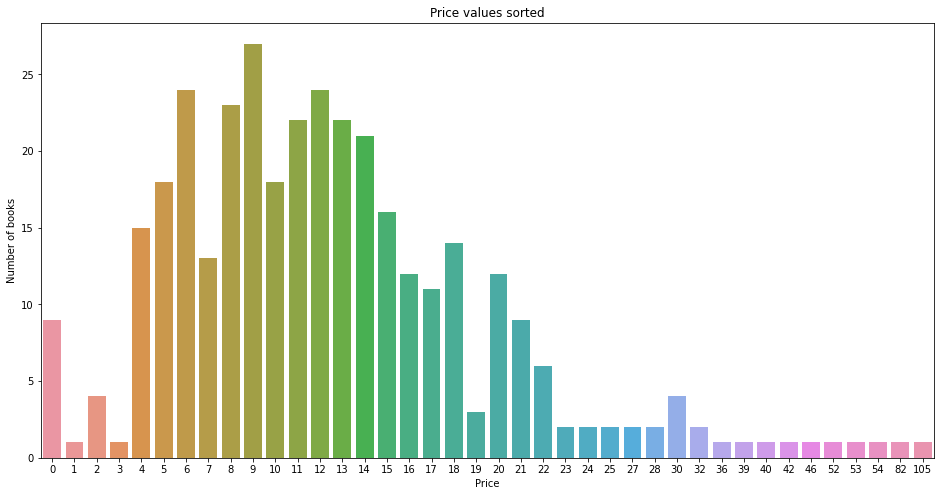

In [70]:
plt.figure(figsize=(16,8))
sns.barplot(x=max_low_price.Price, y=max_low_price.Name)
plt.ylabel("Number of books")
plt.title("Price values sorted")
plt.show()

#### Book with maximum user rating:

In [76]:
data['User Rating'].max()

4.9

In [158]:
max_rating = data[["Name","User Rating"]].groupby('User Rating').count().reset_index()
max_rating

,User Rating,Name
0,3.3,1
1,3.6,1
2,3.8,1
3,3.9,2
4,4.0,4
5,4.1,5
6,4.2,8
7,4.3,21
8,4.4,26
9,4.5,39


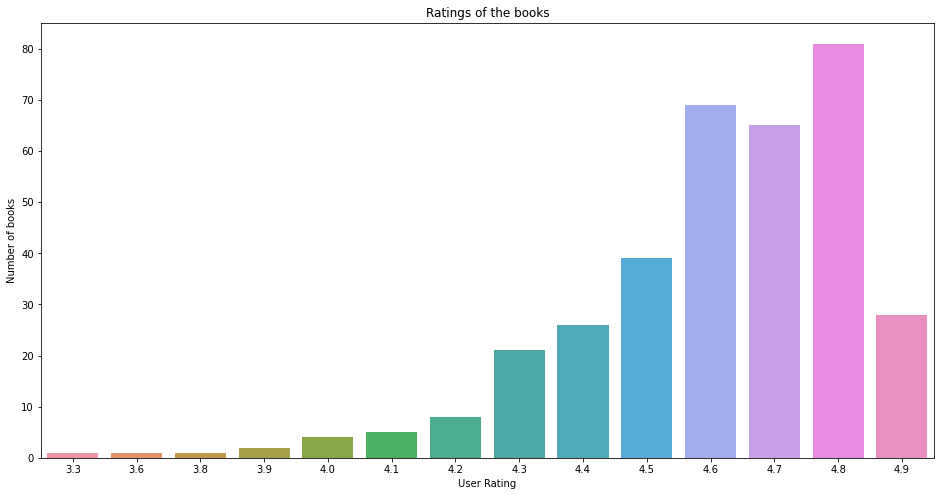

In [90]:
plt.figure(figsize=(16,8))
sns.barplot(x=max_rating['User Rating'], y=max_rating['Name'])
plt.ylabel("Number of books")
plt.title("Ratings of the books")
plt.show()

In [160]:
max_rating_books = data[data["User Rating"]==4.9]
max_rating_books.groupby('Author').count()

,Name,User Rating,Reviews,Price,Year,Genre
Author,,,,,,
Alice Schertle,1,1,1,1,1,1
Bill Martin Jr.,1,1,1,1,1,1
Brandon Stanton,1,1,1,1,1,1
Chip Gaines,1,1,1,1,1,1
Dav Pilkey,6,6,6,6,6,6
Dr. Seuss,1,1,1,1,1,1
Emily Winfield Martin,1,1,1,1,1,1
Eric Carle,1,1,1,1,1,1
J. K. Rowling,1,1,1,1,1,1


#### Book with the maximum number of reviews.

In [116]:
max_review = data[["Reviews","Name"]].groupby("Reviews").count().sort_values(by = "Reviews",ascending =False).reset_index()
max_review


,Reviews,Name
0,87841,1
1,79446,1
2,61133,1
3,57271,1
4,50482,1
...,...,...
340,440,1
341,438,1
342,408,1
343,220,1


In [101]:
data[data['Reviews'] == 87841]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


#### Types of genre.

In [178]:
data[['Genre','Name']].groupby("Genre").count().reset_index()


,Genre,Name
0,Fiction,160
1,Non Fiction,191


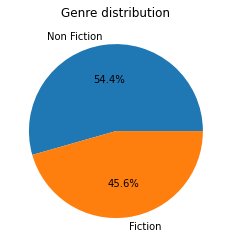

In [144]:
varr = data["Genre"]
varrValue = varr.value_counts()
plt.pie(varrValue, labels = varrValue.index, autopct='%0.1f%%')
plt.title("Genre distribution")
plt.show()

#### Year with maximum books sale

In [151]:
data[['Year','Name']].groupby("Year").count().sort_values(by='Name')

,Name
Year,
2014,27
2017,27
2019,27
2012,28
2016,28
2015,30
2018,30
2011,31
2013,33


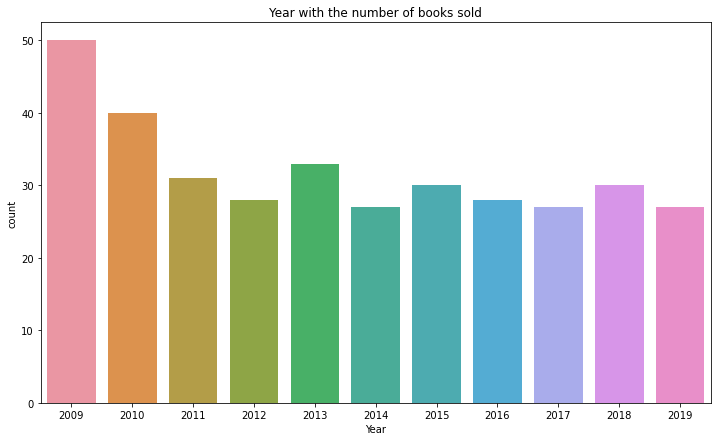

In [147]:
plt.figure(figsize=(12,7))
sns.countplot(data['Year'])
plt.title("Year with the number of books sold")
plt.show()

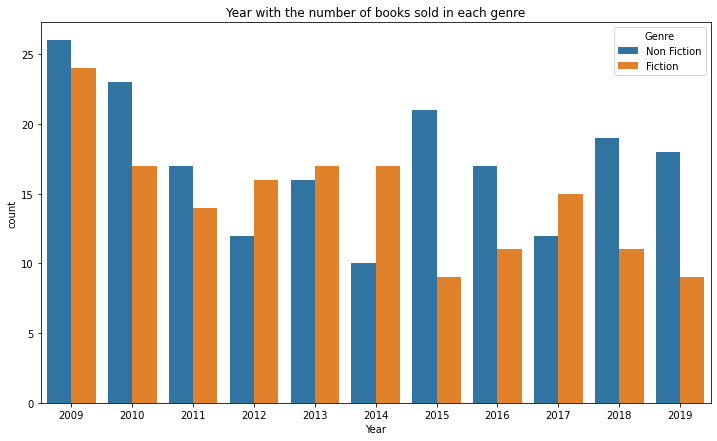

In [180]:
plt.figure(figsize=(12,7))
sns.countplot(data['Year'],hue = data['Genre'])
plt.title("Year with the number of books sold in each genre")
plt.show()

#### Relationship between User rating and the price.

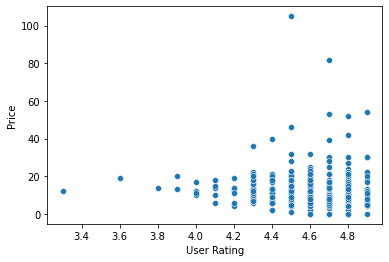

In [174]:
sns.scatterplot(x = data['User Rating'], y = data['Price'])
plt.show()

<AxesSubplot:>

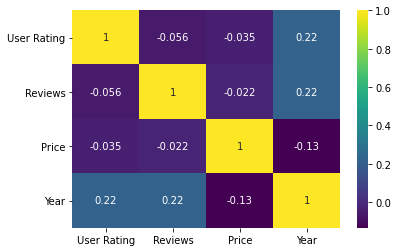

In [168]:
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')


## COMMUNICATING THE DATA ANALYSIS FINDINGS

### 1. Which author has written the maximum number of books?


    Jeff Kinney has written 12 books which is the maximum number in this dataset.

### 2. Which books have the highest and lowest prices?

   #### The lowest price is 0. There are 9 books in this price.
    
    1.Cabin Fever (Diary of a Wimpy Kid, Book 6)	
    2.Diary of a Wimpy Kid: Hard Luck, Book 8	
    3.Frozen (Little Golden Book)	
    4.JOURNEY TO THE ICE P	
    5.Little Blue Truck	
    6.The Constitution of the United States	
    7.The Getaway	
    8.The Short Second Life of Bree Tanner: An Eclip...	
    9.To Kill a Mockingbird
    
   #### The highest price is 105. One book has this price.
    
    1.Diagnostic and Statistical Manual of Mental Di...

### 3. Which book has the highest user rating?

    The highest user rating is 4.9 and 28 books have this same rating.

### 4. Which book has the highest number of reviews?

    "Where the Crawdads Sing" written by Delia Owens has the maximum reviews of 87841

### 5. How many types of genre are there, and how many books each genre consists of?

    There are two genres. 
        1. Fiction  - There are 160 books in this genre
        2. Non Ficton - There are 191 books in this genre

### 6. Which year has the highest number of books sale?

    The highest number of books were sold in the year 2009.

### 7. Is there a relation between the user rating and cost of the books?

    There seems to be very little,(almost nothing) relationship between cost and price. The higher rating has not  increased the price and vice-versa. 